In [158]:
# imports
import nltk
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

In [159]:
# Macros
file = 'docs_stage_3_preprocessed.csv'
TEXT_COLUMN = 2
CLASSIFIER_COLUMN = 20

In [160]:
class TextClassification:
    def __init__(self, text, category):
        self.text = text
        self.category = category     

In [176]:
import csv

textClassifications = []


with open('docs_stage_3_preprocessed.csv', newline='') as csvfile:
    reader = csv.reader(csvfile)
    counter = 0
    for row in reader:
        if counter == 0:
            counter+=1
            continue
        textClassifications.append(TextClassification(row[TEXT_COLUMN], row[CLASSIFIER_COLUMN]))

print(f"{textClassifications[100].text} {textClassifications[100].category}")
        

australia rate year high australia raise benchmark interest rate high level year despite sign slowdown country economy the_reserve_bank_of_australia lift interest rate 0.25 5.5 upwards year shortly bank decision new figure show fall economic growth quarter bank say act curb inflation criticise analyst rate hike december 2003 flag advance opposition party analyst say ill time give datum show australian economy grow 0.1 october december 1.5 annual basis figure represent decline 0.2 growth gdp see july september market expectation consumer spending remain strong bank concerned grow inflationary pressure recent month increasingly clear remain spare capacity labour good market limited say ian_macfarlane governor the_reserve_bank 2.6 inflation remain bank 2 3 target range export decline second half 2004 fuel rise country current account deficit difference value import compare export record australian dollar 29.4bn australian government say economy remain strong unemployment near 30 year low 

In [177]:
from sklearn.model_selection import train_test_split

# textClassifications = textClassifications[0: 1000]
training, test = train_test_split(textClassifications, test_size=0.5)
print(len(training))

struct = {}
for x in training:
    struct[x.category] = True

print(struct.keys())

1102
dict_keys(['Politics', 'Business', 'Tech', 'Sport', 'Entertainment'])


In [178]:
train_x = [x.text for x in training]
train_y = [x.category for x in training]

test_x = [x.text for x in test]
test_y = [x.category for x in test]

In [215]:
# from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(analyzer = "word", 
                             lowercase=True, 
                             tokenizer = None, 
                             preprocessor = None, 
                             stop_words = None, 
                             max_features = 5000)
train_x_vectors = vectorizer.fit_transform(train_x)
test_x_vectors = vectorizer.transform(test_x)

df = pd.DataFrame(train_x_vectors.todense().tolist(), columns=vectorizer.get_feature_names_out())
df

,000,10,100,102,10bn,10th,11,110,11bn,12,...,young,youngster,youth,yugansk,yuganskneftegas,yukos,yushchenko,zafi,zero,zone
0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.061156,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.055983,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1097,0.022742,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1098,0.043536,0.023028,0.029652,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1099,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1100,0.065731,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [216]:
from sklearn import svm

clf_svm = svm.SVC(kernel='linear')
fitted = clf_svm.fit(train_x_vectors, train_y)

print(fitted)

SVC(kernel='linear')


In [181]:
clf_svm.predict(test_x_vectors)

array(['Sport', 'Business', 'Entertainment', ..., 'Entertainment',
       'Politics', 'Sport'], dtype='<U13')

In [326]:
from sklearn.naive_bayes import MultinomialNB

MNBclf = MultinomialNB()
fitted = MNBclf.fit(train_x_vectors, train_y)
print(MNBclf.class_count_)

df = pd.DataFrame(MNBclf.feature_log_prob_, index=[MNBclf.classes_], columns=vectorizer.get_feature_names_out())
# df.to_dict("index")

[242. 200. 208. 237. 215.]


In [330]:
from nltk.tokenize import wordpunct_tokenize
import math

# Daniel's Naieve Bayes
class DansPredictor:
    df = df

    def predictSingleText(self, text):
        wordSums = {}

        text = wordpunct_tokenize(text)
        for index, row in df.iterrows():
            wordSums[index[0]] = math.log(242/1000)
            for word in text:
                if(word in row.keys()):
                    wordSums[index[0]] += row[word]
        return (max(wordSums, key=wordSums.get))
    
    def predict(self, listOfTexts):
        return [self.predictSingleText(text) for text in listOfTexts]


pred = DansPredictor()
pred.predict([test_x[0]])

# print(test_y)

{'Business': -10.247006913452754}
{'Business': -18.967670825093677}
{'Business': -27.36265196460969}
{'Business': -36.190841325236995}
{'Business': -44.656433240238435}
{'Business': -53.377097151879354}
{'Business': -62.20528651250666}
{'Business': -62.20528651250666}
{'Business': -62.20528651250666}
{'Business': -62.20528651250666}
{'Business': -71.03347587313397}
{'Business': -71.03347587313397}
{'Business': -79.75095927048633}
{'Business': -88.14594041000235}
{'Business': -88.14594041000235}
{'Business': -88.14594041000235}
{'Business': -96.5464913288539}
{'Business': -105.37468068948121}
{'Business': -114.07209087664364}
{'Business': -122.90028023727095}
{'Business': -131.24828617121594}
{'Business': -139.8085802126531}
{'Business': -148.5399406293807}
{'Business': -148.5399406293807}
{'Business': -157.36812999000801}
{'Business': -166.13914464442942}
{'Business': -174.96733400505673}
{'Business': -181.15683750373185}
{'Business': -188.31108337541858}
{'Business': -197.139272736045

['Sport']

In [315]:
MNBclf.predict(test_x_vectors)

AttributeError: 'numpy.ndarray' object has no attribute 'toarray'

In [169]:
print(clf_svm.score(test_x_vectors, test_y))
print(MNBclf.score(test_x_vectors, test_y))

0.971894832275612
0.9592021758839528


In [185]:
# F1 Score
from sklearn.metrics import f1_score

labels = list(MNBclf.classes_)

print(f1_score(test_y, clf_svm.predict(test_x_vectors), average=None, labels=labels))
print(f1_score(test_y, MNBclf.predict(test_x_vectors), average=None, labels=labels))

[0.97014925 0.97206704 0.96368039 0.9907919  0.97191011]
[0.97037037 0.94886364 0.95399516 0.99445471 0.96111111]


<Axes: >

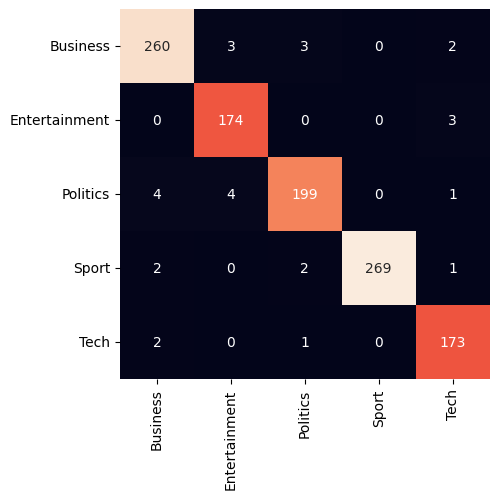

In [305]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib as plt

y_pred = clf_svm.predict(test_x_vectors)
cm = confusion_matrix(test_y, y_pred, labels=labels)
sn.heatmap(cm.T,square=True, annot=True, fmt='d', cbar=False, xticklabels=labels, yticklabels=labels)

['Sport' 'Business' 'Entertainment' ... 'Entertainment' 'Politics' 'Sport']


<Axes: >

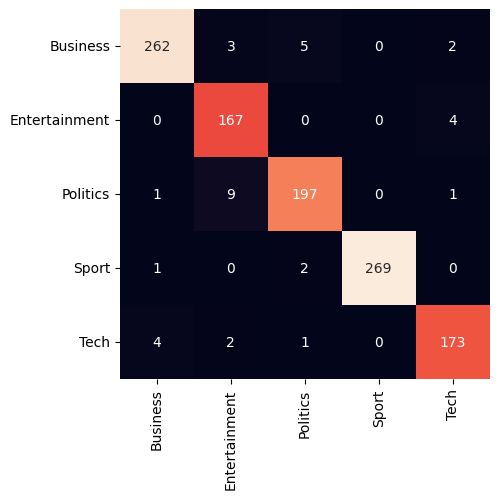

In [306]:
# for Naive Bayes
y_pred = MNBclf.predict(test_x_vectors)
print(y_pred)
cm = confusion_matrix(test_y, y_pred, labels=labels)
sn.heatmap(cm.T,square=True, annot=True, fmt='d', cbar=False, xticklabels=labels, yticklabels=labels)

['Sport', 'Business', 'Entertainment', 'Politics', 'Politics', 'Politics', 'Sport', 'Tech', 'Politics', 'Sport', 'Sport', 'Tech', 'Tech', 'Sport', 'Sport', 'Business', 'Sport', 'Politics', 'Sport', 'Politics', 'Politics', 'Sport', 'Business', 'Sport', 'Business', 'Entertainment', 'Sport', 'Tech', 'Business', 'Business', 'Business', 'Tech', 'Entertainment', 'Politics', 'Entertainment', 'Business', 'Entertainment', 'Entertainment', 'Sport', 'Entertainment', 'Sport', 'Entertainment', 'Sport', 'Sport', 'Business', 'Sport', 'Sport', 'Politics', 'Sport', 'Politics', 'Entertainment', 'Sport', 'Business', 'Entertainment', 'Tech', 'Sport', 'Sport', 'Entertainment', 'Entertainment', 'Entertainment', 'Tech', 'Politics', 'Tech', 'Sport', 'Sport', 'Entertainment', 'Business', 'Sport', 'Business', 'Business', 'Business', 'Politics', 'Sport', 'Business', 'Politics', 'Business', 'Politics', 'Business', 'Tech', 'Entertainment', 'Business', 'Sport', 'Business', 'Business', 'Business', 'Business', 'Busin

<Axes: >

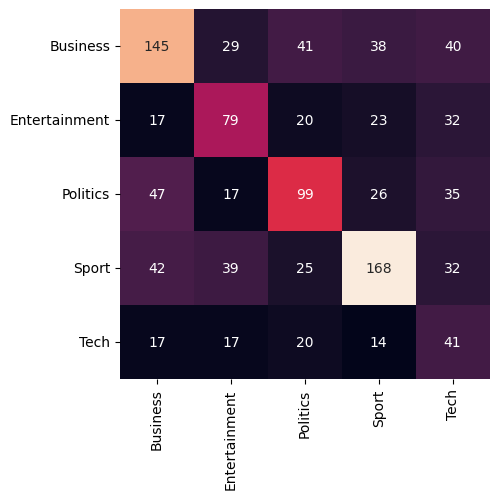

In [322]:
y_pred = DansPredictor().predict(test_x)
print(y_pred)
cm = confusion_matrix(test_y, y_pred, labels=labels)
sn.heatmap(cm.T,square=True, annot=True, fmt='d', cbar=False, xticklabels=labels, yticklabels=labels)